In [210]:
print('Hello')

Hello


In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

import warnings
warnings.filterwarnings('ignore')

In [212]:
dataset = 'navjotkaushal/coffee-sales-dataset'
kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset,unzip=True,path='./dataset/')

Dataset URL: https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset


In [213]:
df = pd.read_csv('./dataset/Coffe_sales.csv')
df.head(3)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [214]:
# Cleaning the columns name
df.columns = df.columns.str.lower().str.strip()

In [215]:
# Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   time_of_day  3547 non-null   object 
 5   weekday      3547 non-null   object 
 6   month_name   3547 non-null   object 
 7   weekdaysort  3547 non-null   int64  
 8   monthsort    3547 non-null   int64  
 9   date         3547 non-null   object 
 10  time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [216]:
# Checking for null values
df.isna().sum().sum()

np.int64(0)

In [217]:
# Checking for duplicate vales
df.duplicated().sum()

np.int64(0)

In [218]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0
monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0


In [219]:
# We can see the shop operating time is from 6:00 to 22:00
# product price range from 18 to 38

In [220]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'time_of_day',
       'weekday', 'month_name', 'weekdaysort', 'monthsort', 'date', 'time'],
      dtype='object')

In [221]:
print(df.cash_type.unique())
df.drop(columns='cash_type',inplace=True)
# There is only one value in this column so we can remove it

['card']


# Analysis

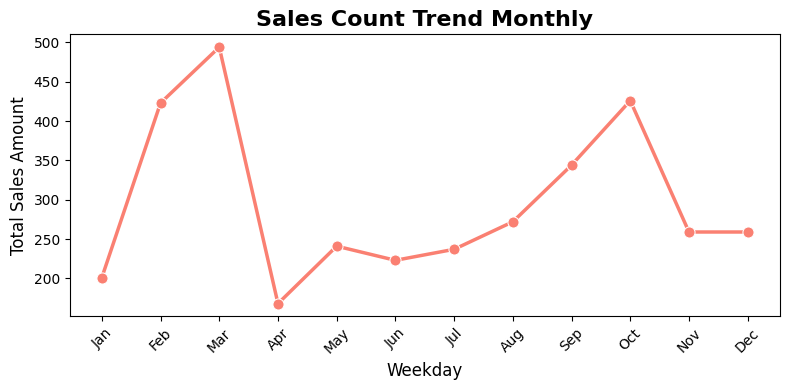

In [222]:
month_sales = df.groupby(['month_name','monthsort']).size().reset_index().sort_values(by='monthsort').reset_index(drop=True)
month_sales.drop(columns='monthsort',inplace=True)

plt.figure(figsize=(8,4))
sns.lineplot(x='month_name', y=0, data=month_sales,marker='o',markersize=8,linewidth=2.5,color='salmon')
plt.title("Sales Count Trend Monthly", fontsize=16, weight='bold')

plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# We can see the month of march has the most sale count and april the least

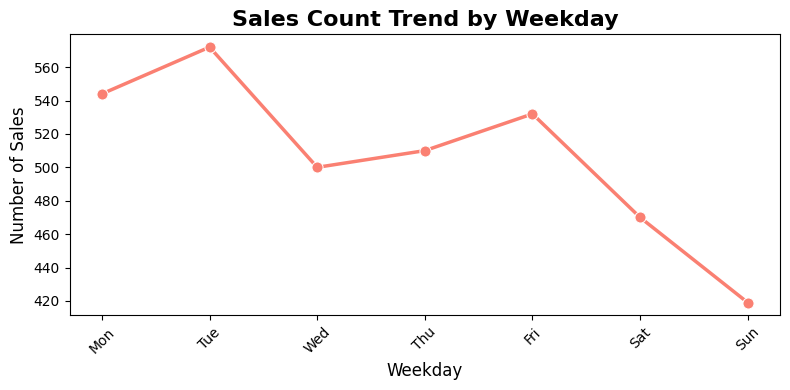

In [223]:
week_day_sale = df.groupby(['weekday', 'weekdaysort']).size().reset_index().sort_values(by='weekdaysort').reset_index(drop=True)
week_day_sale.drop(columns='weekdaysort', inplace=True)

plt.figure(figsize=(8,4))
sns.lineplot(data=week_day_sale, x='weekday', y=0, marker='o', markersize=8, linewidth=2.5, color='salmon')
plt.title("Sales Count Trend by Weekday", fontsize=16, weight='bold')
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Tuesday see the most sales and sunday been the least which can be due to sunday being a holiday

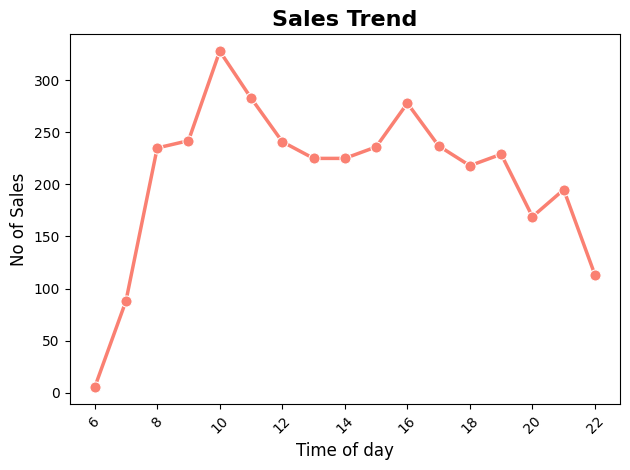

In [224]:
hour_sale = df.groupby('hour_of_day').size()

sns.lineplot(data=hour_sale,marker='o',markersize=8,linewidth=2.5,color='salmon')
plt.title("Sales Trend", fontsize=16, weight='bold')
plt.xlabel("Time of day", fontsize=12)
plt.ylabel("No of Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most sale occur during 10 which is office timing

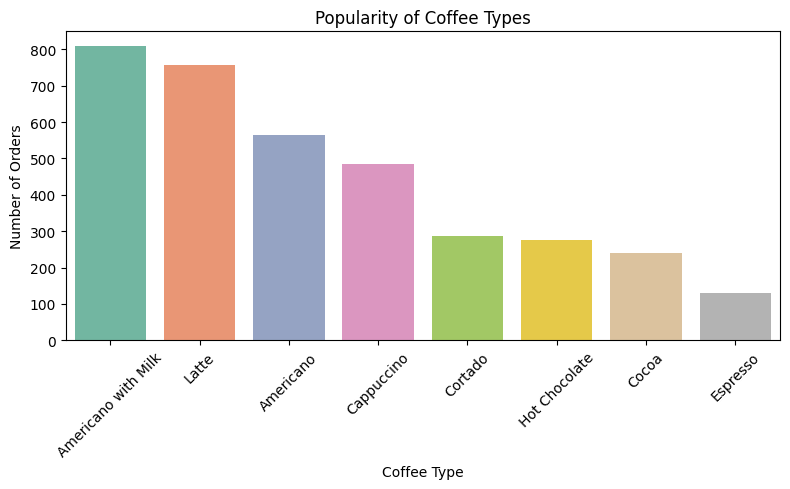

In [225]:
popularity = df.coffee_name.value_counts().reset_index()
popularity.columns = ['coffee_name', 'count']

plt.figure(figsize=(8,5))
sns.barplot(data=popularity, x='coffee_name', y='count', palette='Set2')
plt.xticks(rotation=45)
plt.title("Popularity of Coffee Types")
plt.xlabel("Coffee Type")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# "Americano With milk" is the most popular choice and "Espresso" being the least popular

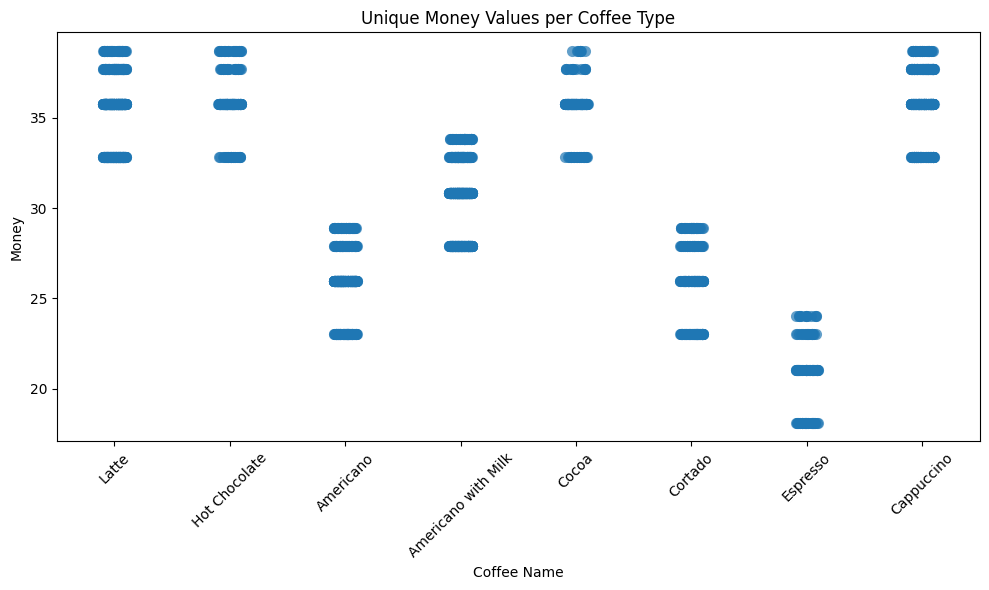

In [226]:
plt.figure(figsize=(10,6))
sns.stripplot(x='coffee_name', y='money', data=df, jitter=True, size=8, alpha=0.7)
plt.title('Unique Money Values per Coffee Type')
plt.xlabel('Coffee Name')
plt.ylabel('Money')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

coffee_price = df.groupby('coffee_name')['money'].unique()

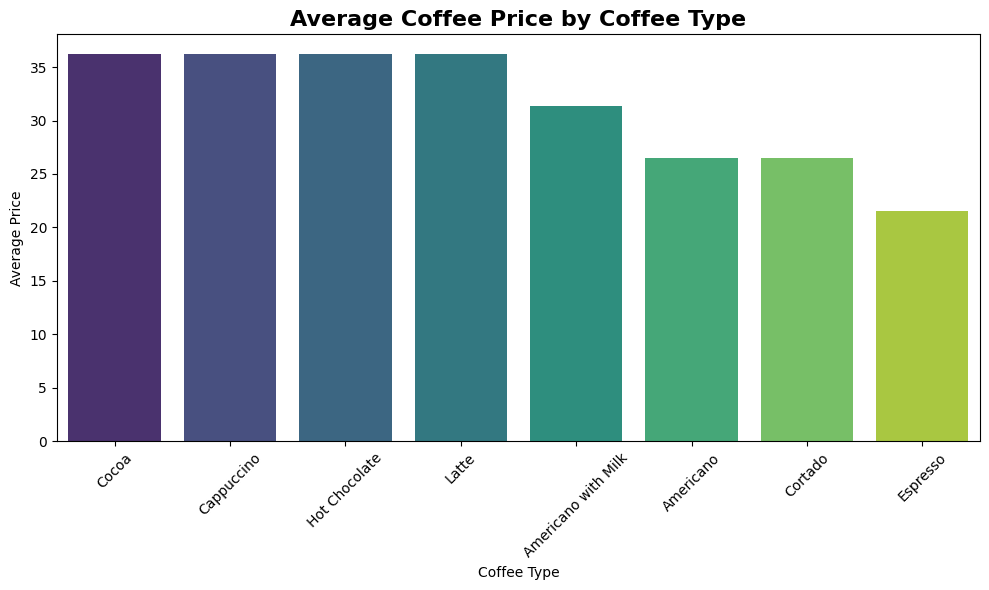

In [230]:
avg_coffee_price = df.groupby('coffee_name')['money'].apply(lambda x: x.unique().mean())
avg_coffee_price = avg_coffee_price.reset_index(name='avg_price')
avg_coffee_price = avg_coffee_price.sort_values(by='avg_price',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_coffee_price, x='coffee_name', y='avg_price', palette='viridis')
plt.title("Average Coffee Price by Coffee Type", fontsize=16, weight='bold')
plt.xlabel("Coffee Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The average price of "Cocoa", "Cappuccino", "Hot Chocolate", "Latte" is same 

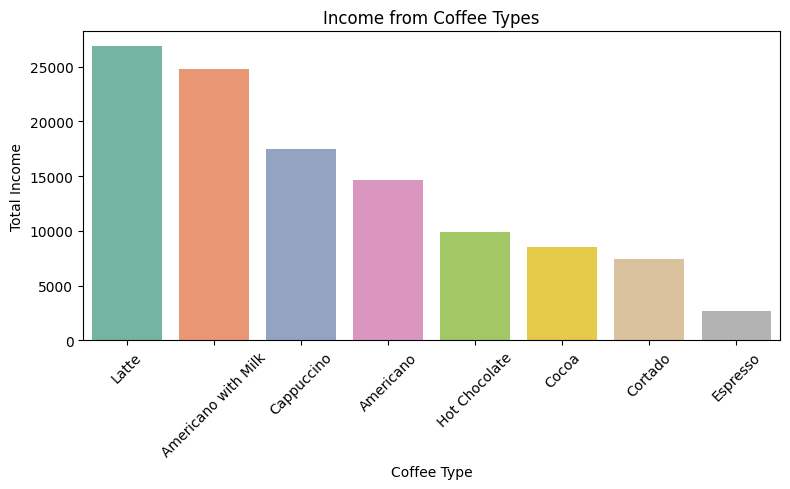

In [229]:
coffee_income = df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money',ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coffee_income, x='coffee_name', y='money', palette='Set2')
plt.xticks(rotation=45)
plt.title("Income from Coffee Types")
plt.xlabel("Coffee Type")
plt.ylabel("Total Income")
plt.tight_layout()
plt.show()

# We can see the income from the "Latte" is the highest this is due to the price difference.